<a href="https://colab.research.google.com/github/Airinelizabath/PROGRAMREPO/blob/main/LinearReg_GDv_sNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION USING NORMAL EQUATION


In [ ]:
import pandas as pd  
import numpy as np

In [ ]:
data = pd.read_csv('/content/ex1data2.txt', delimiter=',',header=None)              
print(data.head())

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


In [ ]:
X1=data[0][:33]
X2=data[1][:33]
y=data[2][:33]

Text(0.5, 1.0, 'No. of Rooms - Price Plot')

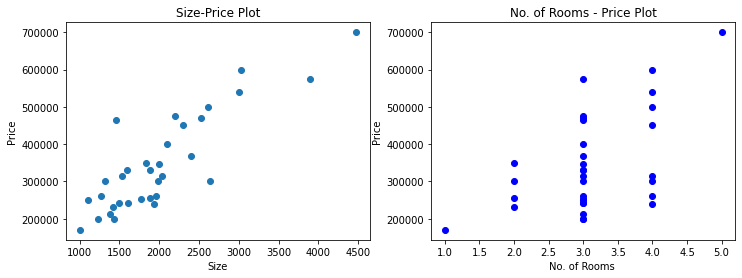

In [ ]:
import matplotlib.pyplot as plt
fig,axes= plt.subplots(figsize=(12,4),nrows=1, ncols=2 )
axes[0].scatter(X1,y)
axes[0].set_xlabel("Size")
axes[0].set_ylabel("Price")
axes[0].set_title("Size-Price Plot")

axes[1].scatter(X2,y,color='b')
axes[1].set_xlabel("No. of Rooms ")
axes[1].set_ylabel("Price")
axes[1].set_title("No. of Rooms - Price Plot")

In [ ]:
X1=np.array(X1)
X2=np.array(X2)
y=np.array(y)

In [ ]:
n=len(X1)
x_bias=np.ones((n,1))

In [ ]:
x1_new=np.reshape(X1,(n,1))
x2_new=np.reshape(X2,(n,1))

In [ ]:
x_new=np.append(x_bias,x1_new,axis=1)
x_new=np.append(x_new,x2_new,axis=1)

In [ ]:
x_new_transpose=np.transpose(x_new)
x_new_transpose_dot=x_new_transpose.dot(x_new)
temp1=np.linalg.inv(x_new_transpose_dot)
temp2=x_new_transpose.dot(y)
theta=temp1.dot(temp2)
theta

array([39935.20888555,   143.29913983,  6021.4005437 ])

In [ ]:
print("The parameter values are theta0:{}, theta1:{},theta2:{}".format(theta[0],theta[1],theta[2]))

The parameter values are theta0:39935.20888554844, theta1:143.2991398274415,theta2:6021.400543704296


In [ ]:
b0=theta[0]
b1=theta[1]
b2=theta[2]
x1=data[0]
x2=data[1]

In [ ]:
def predict(b0,b1,b2,x1,x2):
  pred=b0 + b1*x1 + b2*x2
  return pred

In [ ]:
x1=data[0][33:]
x2=data[1][33:]
y=data[2][33:]
k=predict(b0,b1,b2,x1,x2)
k

33    507528.812155
34    323535.553288
35    263920.274449
36    235547.044763
37    369534.577172
38    668026.685433
39    373833.551367
40    290427.778646
41    378702.885450
42    431869.702997
43    229958.378310
44    174068.877106
45    329410.818021
46    230388.275729
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(k,y))

63984.79928647157

GRADIENT DESCENT

In [ ]:
import pandas as pd  
import numpy as np

In [ ]:
data = pd.read_csv('/content/ex1data2.txt', delimiter=',')              
print(data.head())

   2104  3  399900
0  1600  3  329900
1  2400  3  369000
2  1416  2  232000
3  3000  4  539900
4  1985  4  299900


In [ ]:
X = data.iloc[:, :2] # 2 features
Y = data.iloc[:, 2] # labels
X = np.array(X)
Y = np.array(Y)
from sklearn.model_selection import train_test_split
X, x, Y, y = train_test_split(X,Y,test_size=0.30,random_state=0)
m = len(Y)

In [ ]:
def featureNormalize(X):
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma
  

In [ ]:
def computeCostMulti(X, Y, theta):
    m = len(Y) # number of training examples
    J = np.sum((X.dot(theta)- Y) ** 2)/(2 * m)
    return J

In [ ]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
  
    J = [0] * num_iters  #id array of 400 elements

    m = len(Y) 

    for i in range(num_iters):
        
        h = (X.dot(theta))
        loss = h - Y
        gradient = X.T.dot(loss) / m

        theta = theta - alpha * gradient

        cost = computeCostMulti(X, Y, theta)
        J[i] = cost
    np.shape(h)
    return theta, J

In [ ]:
X_norm, mu, sigma = featureNormalize(X)
X_padded = np.column_stack((np.ones((m,1)), X_norm)) # Add a column of ones to x

alpha = 0.01
num_iters = 400 
theta = np.zeros(X_padded.shape[1])


In [ ]:
theta, J_history= gradientDescentMulti(X_padded, Y, theta, alpha, num_iters)

In [ ]:
theta

array([ 122805.57208901,  159816.91099823, -104705.95103745])

In [ ]:
x_norm, mu, sigma = featureNormalize(x)
x_padded = np.column_stack((np.ones((len(y),1)), x_norm))

In [ ]:
def pred(x_test, newB):
    print(x_test.dot(newB))
    return x_test.dot(newB)

ans = pred(np.array(x_padded), theta) 


[299495.42060147 378356.03597839 484213.05052756 381959.51815676
 384412.26150048 390576.54075721 359290.53252275 367178.21629958
 366967.51629407 562549.61962259 227944.41585216 409690.6636164
 259073.75094843 293017.79506835]


In [ ]:
y_norm, mu, sigma = featureNormalize(y)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ans,y))

95295.66448961855

Here the accuracy of Multivariant linear regression using Gradient Descent is greater than that when using Normal Equation